link to dataset: https://www.kaggle.com/datasets/fahadrehman07/data-science-jobs-and-salary-glassdoor

# Download dataset using kagglehub to path

In [ ]:
import kagglehub

path = kagglehub.dataset_download("fahadrehman07/data-science-jobs-and-salary-glassdoor")
print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/fahadrehman07/data-science-jobs-and-salary-glassdoor/versions/2


# Installations for library dependencies

In [ ]:
!pip install -q numpy
!pip install -q pandas
!pip install -q matplotlib
!pip install -q seaborn
!pip install -U -q scikit-learn

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import warnings
warnings.filterwarnings('ignore')

# Read csv data file from path

In [ ]:
import os

print(os.listdir(path))

['Glassdoor_Salary_Cleaned_Version.csv', 'glassdoor_jobs.csv']


In [ ]:
df = pd.read_csv(os.path.join(path, "glassdoor_jobs.csv"))
pd.set_option('display.max_columns', None)
df.head(5)

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa..."
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee"


In [ ]:
print(df.columns)
print(df.shape)

Index(['Unnamed: 0', 'Job Title', 'Salary Estimate', 'Job Description',
       'Rating', 'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors'],
      dtype='object')
(956, 15)


## Data Cleaning

Transform 'Salary Estimate' column values into a single float value representing the average of the salary range

In [ ]:
df = df[df['Salary Estimate']!= '-1']
df['Salary Estimate'] = df['Salary Estimate'].apply(lambda x: x.split('(')[0])
df.head(10)

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,0,Data Scientist,$53K-$91K,"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1
1,1,Healthcare Data Scientist,$63K-$112K,What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1
2,2,Data Scientist,$80K-$90K,"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1
3,3,Data Scientist,$56K-$97K,*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa..."
4,4,Data Scientist,$86K-$143K,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee"
5,5,Data Scientist,$71K-$119K,CyrusOne is seeking a talented Data Scientist ...,3.4,CyrusOne\n3.4,"Dallas, TX","Dallas, TX",201 to 500 employees,2000,Company - Public,Real Estate,Real Estate,$1 to $2 billion (USD),"Digital Realty, CoreSite, Equinix"
6,6,Data Scientist,$54K-$93K,Job Description\n\n**Please only local candida...,4.1,ClearOne Advantage\n4.1,"Baltimore, MD","Baltimore, MD",501 to 1000 employees,2008,Company - Private,Banks & Credit Unions,Finance,Unknown / Non-Applicable,-1
7,7,Data Scientist,$86K-$142K,Advanced Analytics – Lead Data Scientist\nOver...,3.8,Logic20/20\n3.8,"San Jose, CA","Seattle, WA",201 to 500 employees,2005,Company - Private,Consulting,Business Services,$25 to $50 million (USD),-1
8,8,Research Scientist,$38K-$84K,SUMMARY\n\nThe Research Scientist I will be ta...,3.3,Rochester Regional Health\n3.3,"Rochester, NY","Rochester, NY",10000+ employees,2014,Hospital,Health Care Services & Hospitals,Health Care,$500 million to $1 billion (USD),-1
9,9,Data Scientist,$120K-$160K,isn’t your usual company. Our work is powered ...,4.6,<intent>\n4.6,"New York, NY","New York, NY",51 to 200 employees,2009,Company - Private,Internet,Information Technology,$100 to $500 million (USD),"Clicktripz, SmarterTravel"


In [ ]:
df['Salary Estimate'] = df['Salary Estimate'].apply(lambda x: x.replace('K','').replace('$',''))
df.head(10)

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,0,Data Scientist,53-91,"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1
1,1,Healthcare Data Scientist,63-112,What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1
2,2,Data Scientist,80-90,"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1
3,3,Data Scientist,56-97,*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa..."
4,4,Data Scientist,86-143,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee"
5,5,Data Scientist,71-119,CyrusOne is seeking a talented Data Scientist ...,3.4,CyrusOne\n3.4,"Dallas, TX","Dallas, TX",201 to 500 employees,2000,Company - Public,Real Estate,Real Estate,$1 to $2 billion (USD),"Digital Realty, CoreSite, Equinix"
6,6,Data Scientist,54-93,Job Description\n\n**Please only local candida...,4.1,ClearOne Advantage\n4.1,"Baltimore, MD","Baltimore, MD",501 to 1000 employees,2008,Company - Private,Banks & Credit Unions,Finance,Unknown / Non-Applicable,-1
7,7,Data Scientist,86-142,Advanced Analytics – Lead Data Scientist\nOver...,3.8,Logic20/20\n3.8,"San Jose, CA","Seattle, WA",201 to 500 employees,2005,Company - Private,Consulting,Business Services,$25 to $50 million (USD),-1
8,8,Research Scientist,38-84,SUMMARY\n\nThe Research Scientist I will be ta...,3.3,Rochester Regional Health\n3.3,"Rochester, NY","Rochester, NY",10000+ employees,2014,Hospital,Health Care Services & Hospitals,Health Care,$500 million to $1 billion (USD),-1
9,9,Data Scientist,120-160,isn’t your usual company. Our work is powered ...,4.6,<intent>\n4.6,"New York, NY","New York, NY",51 to 200 employees,2009,Company - Private,Internet,Information Technology,$100 to $500 million (USD),"Clicktripz, SmarterTravel"


In [ ]:
df['PerHour'] = df['Salary Estimate'].apply(lambda x: 1 if 'per hour' in x.lower() else 0)
df['Employee'] = df['Salary Estimate'].apply(lambda x: 1 if 'employee provided salary:' in x.lower() else 0)

In [ ]:
df['Salary Estimate'] = df['Salary Estimate'].apply(lambda x: x.lower().replace('per hour', ''))
df['Salary Estimate'] = df['Salary Estimate'].apply(lambda x: x.lower().replace('employer provided salary:', ''))

In [ ]:
df['Min_Salary'] = df['Salary Estimate'].apply(lambda x: int(x.split('-')[0]))
df['Max_Salary'] = df['Salary Estimate'].apply(lambda x: int(x.split('-')[1]))
df.head(10)

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,PerHour,Employee,Min_Salary,Max_Salary
0,0,Data Scientist,53-91,"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,0,0,53,91
1,1,Healthcare Data Scientist,63-112,What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,0,0,63,112
2,2,Data Scientist,80-90,"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1,0,0,80,90
3,3,Data Scientist,56-97,*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa...",0,0,56,97
4,4,Data Scientist,86-143,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",0,0,86,143
5,5,Data Scientist,71-119,CyrusOne is seeking a talented Data Scientist ...,3.4,CyrusOne\n3.4,"Dallas, TX","Dallas, TX",201 to 500 employees,2000,Company - Public,Real Estate,Real Estate,$1 to $2 billion (USD),"Digital Realty, CoreSite, Equinix",0,0,71,119
6,6,Data Scientist,54-93,Job Description\n\n**Please only local candida...,4.1,ClearOne Advantage\n4.1,"Baltimore, MD","Baltimore, MD",501 to 1000 employees,2008,Company - Private,Banks & Credit Unions,Finance,Unknown / Non-Applicable,-1,0,0,54,93
7,7,Data Scientist,86-142,Advanced Analytics – Lead Data Scientist\nOver...,3.8,Logic20/20\n3.8,"San Jose, CA","Seattle, WA",201 to 500 employees,2005,Company - Private,Consulting,Business Services,$25 to $50 million (USD),-1,0,0,86,142
8,8,Research Scientist,38-84,SUMMARY\n\nThe Research Scientist I will be ta...,3.3,Rochester Regional Health\n3.3,"Rochester, NY","Rochester, NY",10000+ employees,2014,Hospital,Health Care Services & Hospitals,Health Care,$500 million to $1 billion (USD),-1,0,0,38,84
9,9,Data Scientist,120-160,isn’t your usual company. Our work is powered ...,4.6,<intent>\n4.6,"New York, NY","New York, NY",51 to 200 employees,2009,Company - Private,Internet,Information Technology,$100 to $500 million (USD),"Clicktripz, SmarterTravel",0,0,120,160


In [ ]:
df['Salary Estimate']= (df['Min_Salary'] + df['Max_Salary'])/2

In [ ]:
df = df.drop(['Min_Salary','Max_Salary'] , axis =1)
df.head(5)

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,PerHour,Employee
0,0,Data Scientist,72.0,"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,0,0
1,1,Healthcare Data Scientist,87.5,What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,0,0
2,2,Data Scientist,85.0,"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1,0,0
3,3,Data Scientist,76.5,*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa...",0,0
4,4,Data Scientist,114.5,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",0,0


Remove new line and rating from Company Name column values

In [ ]:
df['Company Name'] = df.apply(lambda x: x['Company Name'] if x['Rating']<0 else x['Company Name'][:-1], axis = 1)
df['Company Name'] = df['Company Name'].apply(lambda x: x.split('\n')[0])
df.head(5)

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,PerHour,Employee
0,0,Data Scientist,72.0,"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,0,0
1,1,Healthcare Data Scientist,87.5,What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,0,0
2,2,Data Scientist,85.0,"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1,0,0
3,3,Data Scientist,76.5,*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa...",0,0
4,4,Data Scientist,114.5,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",0,0


Create State data column by extracting from Location and create column if company headquarters is in the same state as job

In [ ]:
df['State'] = df.Location.apply(lambda x: x.split(',')[1])
df['Same State'] = df.apply(lambda x: 1 if x.Location==x.Headquarters else 0, axis =1)
df.head()

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,PerHour,Employee,State,Same State
0,0,Data Scientist,72.0,"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,0,0,NM,0
1,1,Healthcare Data Scientist,87.5,What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,0,0,MD,0
2,2,Data Scientist,85.0,"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1,0,0,FL,1
3,3,Data Scientist,76.5,*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa...",0,0,WA,1
4,4,Data Scientist,114.5,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",0,0,NY,1


Create company Age column from the Founded column by subtracting founding year from 2024

In [ ]:
# company age is 2024 - founding year
df['Age'] = df['Founded'].apply(lambda x: x if x<1 else 2024-x)
df.head()

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,PerHour,Employee,State,Same State,Age
0,0,Data Scientist,72.0,"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,0,0,NM,0,50
1,1,Healthcare Data Scientist,87.5,What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,0,0,MD,0,39
2,2,Data Scientist,85.0,"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1,0,0,FL,1,13
3,3,Data Scientist,76.5,*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa...",0,0,WA,1,58
4,4,Data Scientist,114.5,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",0,0,NY,1,25


Simplify the Job Title column by converting to lower case and making a new column of short titles names

In [ ]:
def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'

In [ ]:
df['Job_simp'] = df['Job Title'].apply(title_simplifier)

In [ ]:
df.Job_simp.value_counts()

,count
Job_simp,
data scientist,279
na,184
data engineer,119
analyst,102
manager,22
mle,22
director,14


In [ ]:
df.head()

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,PerHour,Employee,State,Same State,Age,Job_simp
0,0,Data Scientist,72.0,"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,0,0,NM,0,50,data scientist
1,1,Healthcare Data Scientist,87.5,What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,0,0,MD,0,39,data scientist
2,2,Data Scientist,85.0,"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1,0,0,FL,1,13,data scientist
3,3,Data Scientist,76.5,*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa...",0,0,WA,1,58,data scientist
4,4,Data Scientist,114.5,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",0,0,NY,1,25,data scientist


Extract seniority level from Job Title values and make new column from results

In [ ]:
def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
        return 'senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower():
        return 'jr'
    else:
        return 'na'

In [ ]:
df['seniority'] = df['Job Title'].apply(seniority)
df.seniority.value_counts()

,count
seniority,
na,520
senior,220
jr,2


Create new job state column from extracted State data. A single Los Angeles row value managed to sneak into the State column so here we strip whitespace for all new values in job_state column and handle for the Los Angeles value to return CA.

In [ ]:
df['job_state'] = df.State.apply(lambda x: x.strip() if x.strip().lower() != 'los angeles' else 'CA')
#df.State.value_counts()
df.job_state.value_counts()

,count
job_state,
CA,152
MA,103
NY,72
VA,41
IL,40
MD,35
PA,33
TX,28
NC,21


Create a new column that represents the count of the Competitors column. Splits each value in the Competitors column and counts the length if applicable otherwise is a 0.

In [ ]:
df['Num_comp'] = df['Competitors'].apply(lambda x: len(x.split(',')) if x != '-1' else 0)
df[['Competitors','Num_comp']]

,Competitors,Num_comp
0,-1,0
1,-1,0
2,-1,0
3,"Oak Ridge National Laboratory, National Renewa...",3
4,"Commerce Signals, Cardlytics, Yodlee",3
...,...,...
950,"Pfizer, AstraZeneca, Merck",3
951,"See Tickets, TicketWeb, Vendini",3
952,-1,0
953,-1,0


In [ ]:
df.head(10)

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,PerHour,Employee,State,Same State,Age,Job_simp,seniority,job_state,Num_comp
0,0,Data Scientist,72.0,"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,0,0,NM,0,50,data scientist,na,NM,0
1,1,Healthcare Data Scientist,87.5,What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,0,0,MD,0,39,data scientist,na,MD,0
2,2,Data Scientist,85.0,"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1,0,0,FL,1,13,data scientist,na,FL,0
3,3,Data Scientist,76.5,*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa...",0,0,WA,1,58,data scientist,na,WA,3
4,4,Data Scientist,114.5,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",0,0,NY,1,25,data scientist,na,NY,3
5,5,Data Scientist,95.0,CyrusOne is seeking a talented Data Scientist ...,3.4,CyrusOne,"Dallas, TX","Dallas, TX",201 to 500 employees,2000,Company - Public,Real Estate,Real Estate,$1 to $2 billion (USD),"Digital Realty, CoreSite, Equinix",0,0,TX,1,23,data scientist,na,TX,3
6,6,Data Scientist,73.5,Job Description\n\n**Please only local candida...,4.1,ClearOne Advantage,"Baltimore, MD","Baltimore, MD",501 to 1000 employees,2008,Company - Private,Banks & Credit Unions,Finance,Unknown / Non-Applicable,-1,0,0,MD,1,15,data scientist,na,MD,0
7,7,Data Scientist,114.0,Advanced Analytics – Lead Data Scientist\nOver...,3.8,Logic20/20,"San Jose, CA","Seattle, WA",201 to 500 employees,2005,Company - Private,Consulting,Business Services,$25 to $50 million (USD),-1,0,0,CA,0,18,data scientist,na,CA,0
8,8,Research Scientist,61.0,SUMMARY\n\nThe Research Scientist I will be ta...,3.3,Rochester Regional Health,"Rochester, NY","Rochester, NY",10000+ employees,2014,Hospital,Health Care Services & Hospitals,Health Care,$500 million to $1 billion (USD),-1,0,0,NY,1,9,na,na,NY,0
9,9,Data Scientist,140.0,isn’t your usual company. Our work is powered ...,4.6,<intent>,"New York, NY","New York, NY",51 to 200 employees,2009,Company - Private,Internet,Information Technology,$100 to $500 million (USD),"Clicktripz, SmarterTravel",0,0,NY,1,14,data scientist,na,NY,2


Drop unnecessary columns from data we don't find relevant to the regression or we have already made updated columns for.

In [ ]:
df = df.drop(['Competitors', 'PerHour', 'Employee', 'Same State'], axis =1)
df.head()

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,State,Age,Job_simp,seniority,job_state,Num_comp
0,0,Data Scientist,72.0,"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),NM,50,data scientist,na,NM,0
1,1,Healthcare Data Scientist,87.5,What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),MD,39,data scientist,na,MD,0
2,2,Data Scientist,85.0,"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),FL,13,data scientist,na,FL,0
3,3,Data Scientist,76.5,*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),WA,58,data scientist,na,WA,3
4,4,Data Scientist,114.5,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,NY,25,data scientist,na,NY,3


# Explore cleaned data

In [ ]:
df.describe()

,Unnamed: 0,Salary Estimate,Rating,Founded,Age,Num_comp
count,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000
mean,469.129380,100.626011,3.618868,1837.154987,49.389488,1.053908
std,279.793117,38.855948,0.801210,497.183763,53.962906,1.384239
min,0.000000,13.500000,-1.000000,-1.000000,-1.000000,0.000000
25%,221.500000,73.500000,3.300000,1939.000000,14.000000,0.000000
50%,472.500000,97.500000,3.700000,1988.000000,27.000000,0.000000
75%,707.750000,122.500000,4.000000,2007.000000,62.000000,3.000000
max,955.000000,254.000000,5.000000,2019.000000,279.000000,4.000000


<Axes: >

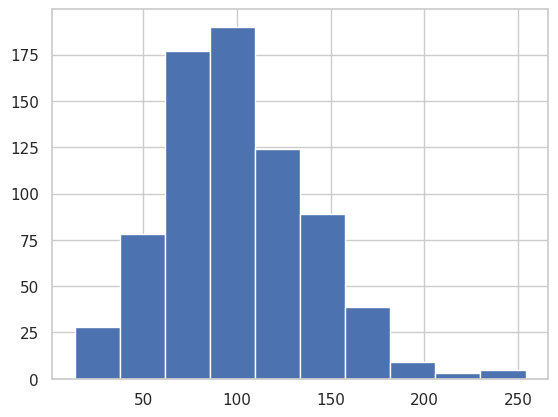

In [ ]:
sns.set(style="whitegrid")

df['Salary Estimate'].hist()

<Axes: >

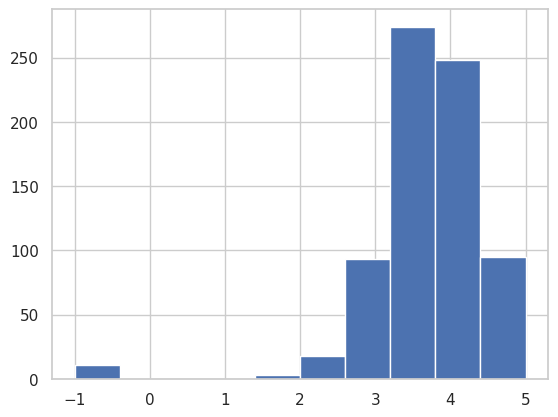

In [ ]:
sns.set(style="whitegrid")

df['Rating'].hist()

<Axes: >

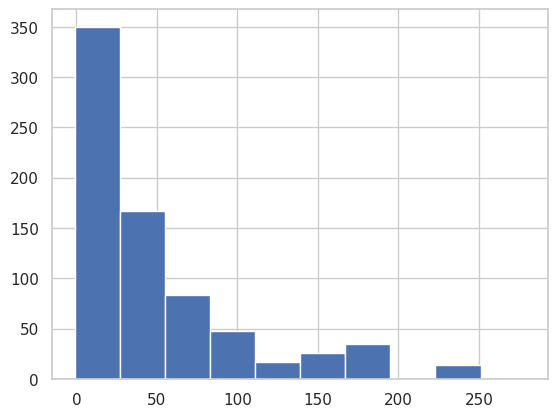

In [ ]:
sns.set(style="whitegrid")

df['Age'].hist()

Look at the correlation between the numerical type columns in our cleaned dataset.

In [ ]:
df[['Salary Estimate', 'Rating', 'Age']].corr()

,Salary Estimate,Rating,Age
Salary Estimate,1.000000,0.013492,0.019410
Rating,0.013492,1.000000,0.026164
Age,0.019410,0.026164,1.000000


<Axes: >

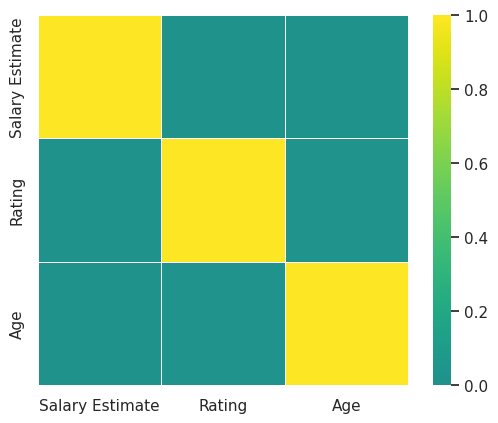

In [ ]:
sns.heatmap(df[['Salary Estimate', 'Rating', 'Age']].corr(), vmin=0, vmax=1,
            center=0, cmap='viridis', square=True, linewidths=0.5)

Look at the distribution of categorical data in the cleaned dataset.

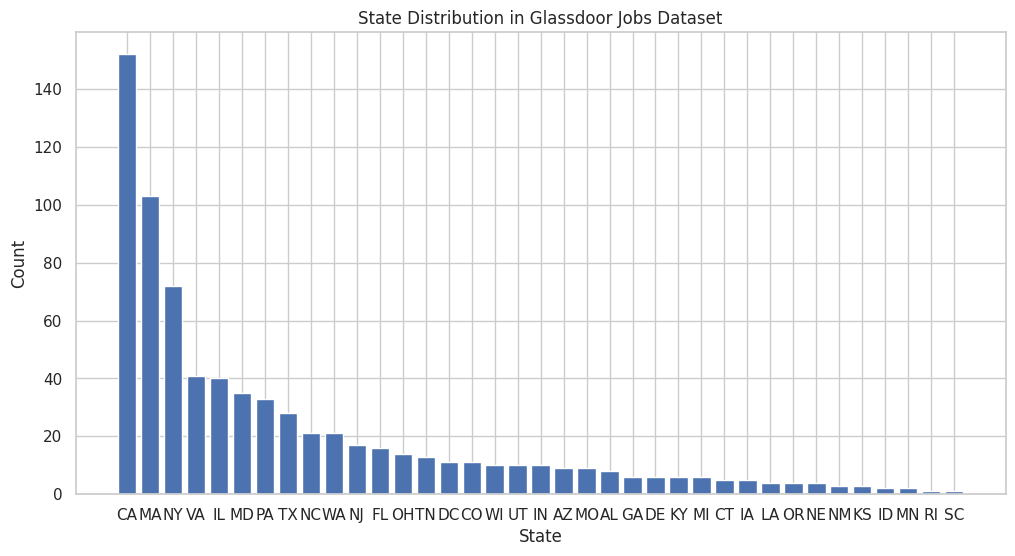

In [ ]:
statevals = df['job_state'].value_counts()
plt.figure(figsize=(12, 6))
plt.bar(statevals.index, statevals.values)
plt.xlabel('State')
plt.ylabel('Count')
plt.title('State Distribution in Glassdoor Jobs Dataset')
plt.show()

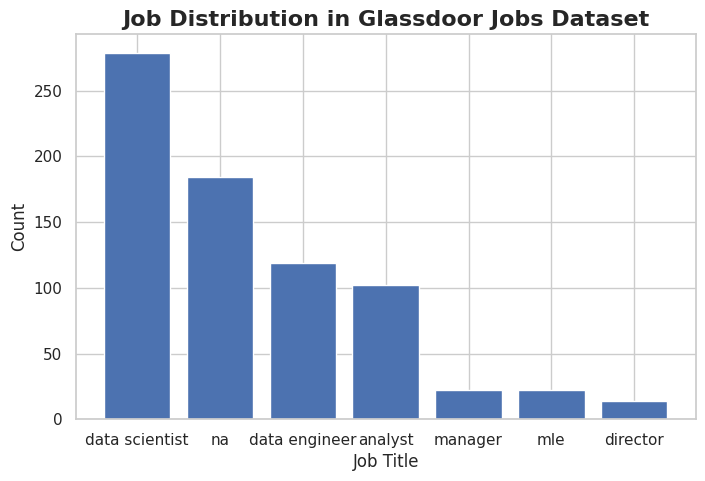

In [ ]:
jobvals = df['Job_simp'].value_counts()
plt.figure(figsize=(8, 5))
plt.bar(jobvals.index, jobvals)
plt.xlabel('Job Title', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Job Distribution in Glassdoor Jobs Dataset',fontsize=16,weight='bold')
plt.show()

# Define regression model

First, we choose the relevant columns to use as our features. The label to predict is the Salary Estimate.

In [ ]:
df.head()

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,State,Age,Job_simp,seniority,job_state,Num_comp
0,0,Data Scientist,72.0,"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),NM,50,data scientist,na,NM,0
1,1,Healthcare Data Scientist,87.5,What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),MD,39,data scientist,na,MD,0
2,2,Data Scientist,85.0,"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),FL,13,data scientist,na,FL,0
3,3,Data Scientist,76.5,*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),WA,58,data scientist,na,WA,3
4,4,Data Scientist,114.5,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,NY,25,data scientist,na,NY,3


In [ ]:
df.columns

Index(['Unnamed: 0', 'Job Title', 'Salary Estimate', 'Job Description',
       'Rating', 'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'State', 'Age',
       'Job_simp', 'seniority', 'job_state', 'Num_comp'],
      dtype='object')

In [ ]:
#make a list of the chosen columns to use as our data
cols = ['Salary Estimate', 'Job_simp', 'Rating', 'Revenue',
        'Type of ownership', 'Industry', 'Sector','Age',
        'seniority', 'job_state', 'Num_comp'
        ]

In [ ]:
#create a new dataframe based off the chosen columns for our model data
df_model = df[cols]
df_model.head()

,Salary Estimate,Job_simp,Rating,Revenue,Type of ownership,Industry,Sector,Age,seniority,job_state,Num_comp
0,72.0,data scientist,3.8,$50 to $100 million (USD),Company - Private,Aerospace & Defense,Aerospace & Defense,50,na,NM,0
1,87.5,data scientist,3.4,$2 to $5 billion (USD),Other Organization,Health Care Services & Hospitals,Health Care,39,na,MD,0
2,85.0,data scientist,4.8,$100 to $500 million (USD),Company - Private,Security Services,Business Services,13,na,FL,0
3,76.5,data scientist,3.8,$500 million to $1 billion (USD),Government,Energy,"Oil, Gas, Energy & Utilities",58,na,WA,3
4,114.5,data scientist,2.9,Unknown / Non-Applicable,Company - Private,Advertising & Marketing,Business Services,25,na,NY,3


Use pd.get_dummies() to covert categorical variables into dummy variables via encoding to be able to interpret all data as numerical.

In [ ]:
df_dum  = pd.get_dummies(df_model)
df_dum.head()

,Salary Estimate,Rating,Age,Num_comp,Job_simp_analyst,Job_simp_data engineer,Job_simp_data scientist,Job_simp_director,Job_simp_manager,Job_simp_mle,Job_simp_na,Revenue_$1 to $2 billion (USD),Revenue_$1 to $5 million (USD),Revenue_$10 to $25 million (USD),Revenue_$10+ billion (USD),Revenue_$100 to $500 million (USD),Revenue_$2 to $5 billion (USD),Revenue_$25 to $50 million (USD),Revenue_$5 to $10 billion (USD),Revenue_$5 to $10 million (USD),Revenue_$50 to $100 million (USD),Revenue_$500 million to $1 billion (USD),Revenue_-1,Revenue_Less than $1 million (USD),Revenue_Unknown / Non-Applicable,Type of ownership_-1,Type of ownership_College / University,Type of ownership_Company - Private,Type of ownership_Company - Public,Type of ownership_Government,Type of ownership_Hospital,Type of ownership_Nonprofit Organization,Type of ownership_Other Organization,Type of ownership_School / School District,Type of ownership_Subsidiary or Business Segment,Type of ownership_Unknown,Industry_-1,Industry_Accounting,Industry_Advertising & Marketing,Industry_Aerospace & Defense,Industry_Architectural & Engineering Services,Industry_Auctions & Galleries,Industry_Banks & Credit Unions,Industry_Beauty & Personal Accessories Stores,Industry_Biotech & Pharmaceuticals,Industry_Brokerage Services,Industry_Colleges & Universities,Industry_Computer Hardware & Software,Industry_Construction,Industry_Consulting,Industry_Consumer Product Rental,Industry_Consumer Products Manufacturing,"Industry_Department, Clothing, & Shoe Stores",Industry_Education Training Services,Industry_Energy,Industry_Enterprise Software & Network Solutions,Industry_Farm Support Services,Industry_Federal Agencies,Industry_Financial Analytics & Research,Industry_Financial Transaction Processing,Industry_Food & Beverage Manufacturing,Industry_Gambling,Industry_Gas Stations,Industry_Health Care Products Manufacturing,Industry_Health Care Services & Hospitals,"Industry_Health, Beauty, & Fitness",Industry_IT Services,Industry_Industrial Manufacturing,Industry_Insurance Agencies & Brokerages,Industry_Insurance Carriers,Industry_Internet,Industry_Investment Banking & Asset Management,Industry_K-12 Education,Industry_Lending,Industry_Logistics & Supply Chain,Industry_Metals Brokers,Industry_Mining,Industry_Motion Picture Production & Distribution,Industry_Other Retail Stores,Industry_Real Estate,Industry_Religious Organizations,Industry_Research & Development,Industry_Security Services,Industry_Social Assistance,Industry_Sporting Goods Stores,Industry_Staffing & Outsourcing,Industry_Stock Exchanges,Industry_TV Broadcast & Cable Networks,Industry_Telecommunications Manufacturing,Industry_Telecommunications Services,Industry_Transportation Equipment Manufacturing,Industry_Transportation Management,Industry_Travel Agencies,Industry_Trucking,Industry_Video Games,Industry_Wholesale,Sector_-1,Sector_Accounting & Legal,Sector_Aerospace & Defense,Sector_Agriculture & Forestry,"Sector_Arts, Entertainment & Recreation",Sector_Biotech & Pharmaceuticals,Sector_Business Services,"Sector_Construction, Repair & Maintenance",Sector_Consumer Services,Sector_Education,Sector_Finance,Sector_Government,Sector_Health Care,Sector_Information Technology,Sector_Insurance,Sector_Manufacturing,Sector_Media,Sector_Mining & Metals,Sector_Non-Profit,"Sector_Oil, Gas, Energy & Utilities",Sector_Real Estate,Sector_Retail,Sector_Telecommunications,Sector_Transportation & Logistics,Sector_Travel & Tourism,seniority_jr,seniority_na,seniority_senior,job_state_AL,job_state_AZ,job_state_CA,job_state_CO,job_state_CT,job_state_DC,job_state_DE,job_state_FL,job_state_GA,job_state_IA,job_state_ID,job_state_IL,job_state_IN,job_state_KS,job_state_KY,job_state_LA,job_state_MA,job_state_MD,job_state_MI,job_state_MN,job_state_MO,job_state_NC,job_state_NE,job_state_NJ,job_state_NM,job_state_NY,job_state_OH,job_state_OR,job_state_PA,job_state_RI,job_state_SC,job_state_TN,job_state_TX,job_state_UT,job_state_VA,job_state_WA,job_state_WI
0,7

In [ ]:
df_dum.dtypes

,0
Salary Estimate,float64
Rating,float64
Age,int64
Num_comp,int64
Job_simp_analyst,bool
...,...
job_state_TX,bool
job_state_UT,bool
job_state_VA,bool
job_state_WA,bool


Split the data into X and y

In [ ]:
from sklearn.model_selection import train_test_split
X= df_dum.drop('Salary Estimate', axis=1)
y= df_dum['Salary Estimate'].values

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42)

# Linear Regression Fitting

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

lm = LinearRegression()
lm.fit(X_train,y_train)

array([-19.83568843, -20.47295831, -18.56609855, -18.64705539,
       -20.75044679])

#Linear Regression Evaluations

make salary predictions on the testing features and evaluate results

In [ ]:
lmpred = lm.predict(X_test)
# Evaluating the model
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, lmpred)
print(f'Mean Squared Error: {mse}')

r2 = r2_score(y_test, lmpred)
print(f'R-squared: {r2}')

mae = np.mean(np.absolute(lmpred - y_test))
print(f'Mean absolute error: {mae}')

Mean Squared Error: 691.1725256749602
R-squared: 0.5771380896289589
Mean absolute error: 19.181702354375442


# Random Forest Regression: First Attempt

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(X_train,y_train)

Random Forest Evaluations: First Attempt

In [ ]:
#from sklearn.metrics import mean_squared_error, r2_score

predictions = rf.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

r2 = r2_score(y_test, predictions)
print(f'R-squared: {r2}')

mae = np.mean(np.absolute(predictions - y_test))
print(f'Mean absolute error: {mae}')

Mean Squared Error: 370.9976680480984
R-squared: 0.7730222530173356
Mean absolute error: 11.870624158000835


# Increase Accuracy by Dropping Irrelevant Features

let's try returning to the df model dataframe and dropping features to increase accuracy

In [ ]:
df_model = df_model.drop(['seniority','Num_comp','Rating','Age'], axis=1)
df_model.head()

,Salary Estimate,Job_simp,Revenue,Type of ownership,Industry,Sector,job_state
0,72.0,data scientist,$50 to $100 million (USD),Company - Private,Aerospace & Defense,Aerospace & Defense,NM
1,87.5,data scientist,$2 to $5 billion (USD),Other Organization,Health Care Services & Hospitals,Health Care,MD
2,85.0,data scientist,$100 to $500 million (USD),Company - Private,Security Services,Business Services,FL
3,76.5,data scientist,$500 million to $1 billion (USD),Government,Energy,"Oil, Gas, Energy & Utilities",WA
4,114.5,data scientist,Unknown / Non-Applicable,Company - Private,Advertising & Marketing,Business Services,NY


In [ ]:
df_model = df_model[df_model['Job_simp'] != 'na']
df_model.Job_simp.value_counts()

,count
Job_simp,
data scientist,279
data engineer,119
analyst,102
manager,22
mle,22
director,14


In [ ]:
df_model.head()

,Salary Estimate,Job_simp,Revenue,Type of ownership,Industry,Sector,job_state
0,72.0,data scientist,$50 to $100 million (USD),Company - Private,Aerospace & Defense,Aerospace & Defense,NM
1,87.5,data scientist,$2 to $5 billion (USD),Other Organization,Health Care Services & Hospitals,Health Care,MD
2,85.0,data scientist,$100 to $500 million (USD),Company - Private,Security Services,Business Services,FL
3,76.5,data scientist,$500 million to $1 billion (USD),Government,Energy,"Oil, Gas, Energy & Utilities",WA
4,114.5,data scientist,Unknown / Non-Applicable,Company - Private,Advertising & Marketing,Business Services,NY


# Random Forest Regression: Second Attempt

In [ ]:
df_dum = pd.get_dummies(df_model)
X= df_dum.drop('Salary Estimate', axis=1)
y= df_dum['Salary Estimate'].values

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42)
rf = RandomForestRegressor()
rf.fit(X_train,y_train)

RandomForestRegressor()

# Random Forest Evaluations: Second Attempt

In [ ]:
predictions = rf.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

r2 = r2_score(y_test, predictions)
print(f'R-squared: {r2}')

mae = np.mean(np.absolute(predictions - y_test))
print(f'Mean absolute error: {mae}')

Mean Squared Error: 323.0630239017638
R-squared: 0.8031775108448103
Mean absolute error: 12.800702129686377


In [ ]:
#R squared score
print("R-squared score for training data: ",end="")
print(rf.score(X_train, y_train))
print("R-squared score for testing data: ",end="")
print(rf.score(X_test, y_test))

R-squared score for training data: 0.9035135360520188
R-squared score for testing data: 0.8031775108448103


Because the R-squared score is much higher for the training set than the testing set, we conclude that this is a sign of overfitting.